In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set(font_scale=1.1)

In [16]:
# Load the heart.csv dataset
df = pd.read_csv('heart.csv')
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [17]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (918, 12)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [20]:
target_col = 'HeartDisease'

numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

print(df[target_col].value_counts())
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


HeartDisease
1    508
0    410
Name: count, dtype: int64
Numeric features: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categorical features: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [21]:
# Missing values and quality checks
print("Missing values in each column:\n", df.isna().sum())

Missing values in each column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [22]:
# Look some basic value ranges
df[numeric_features].agg(['min', 'max', 'mean', 'median', 'std']).T

,min,max,mean,median,std
Age,28.0,77.0,53.510893,54.0,9.432617
RestingBP,0.0,200.0,132.396514,130.0,18.514154
Cholesterol,0.0,603.0,198.799564,223.0,109.384145
FastingBS,0.0,1.0,0.233115,0.0,0.423046
MaxHR,60.0,202.0,136.809368,138.0,25.460334
Oldpeak,-2.6,6.2,0.887364,0.6,1.066570


In [23]:
for col in categorical_features:
    print(f"\nUnique value for {col}:", df[col].unique())


Unique value for Sex: ['M' 'F']

Unique value for ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']

Unique value for RestingECG: ['Normal' 'ST' 'LVH']

Unique value for ExerciseAngina: ['N' 'Y']

Unique value for ST_Slope: ['Up' 'Flat' 'Down']


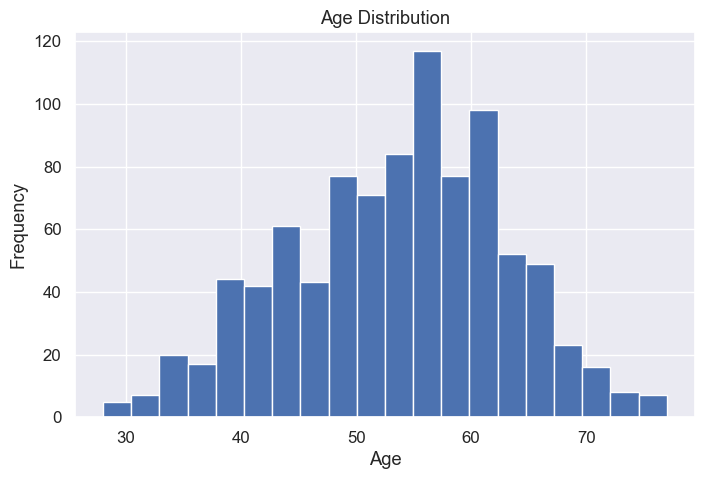

In [24]:
df['Age'].hist(bins=20, figsize=(8, 5))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

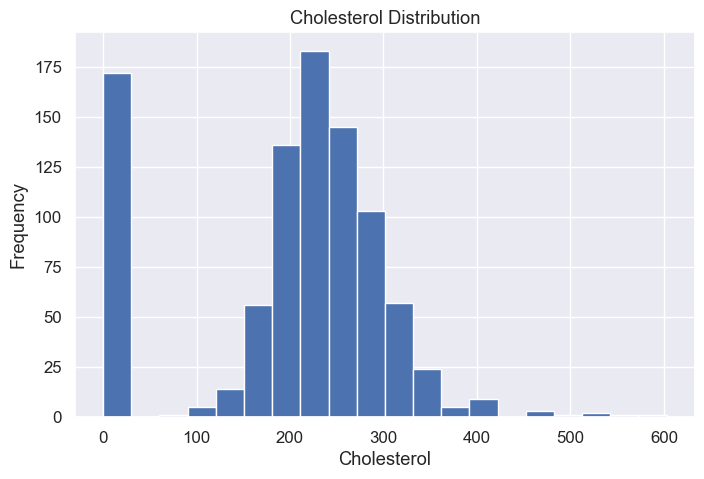

In [25]:
df['Cholesterol'].hist(bins=20, figsize=(8, 5))
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

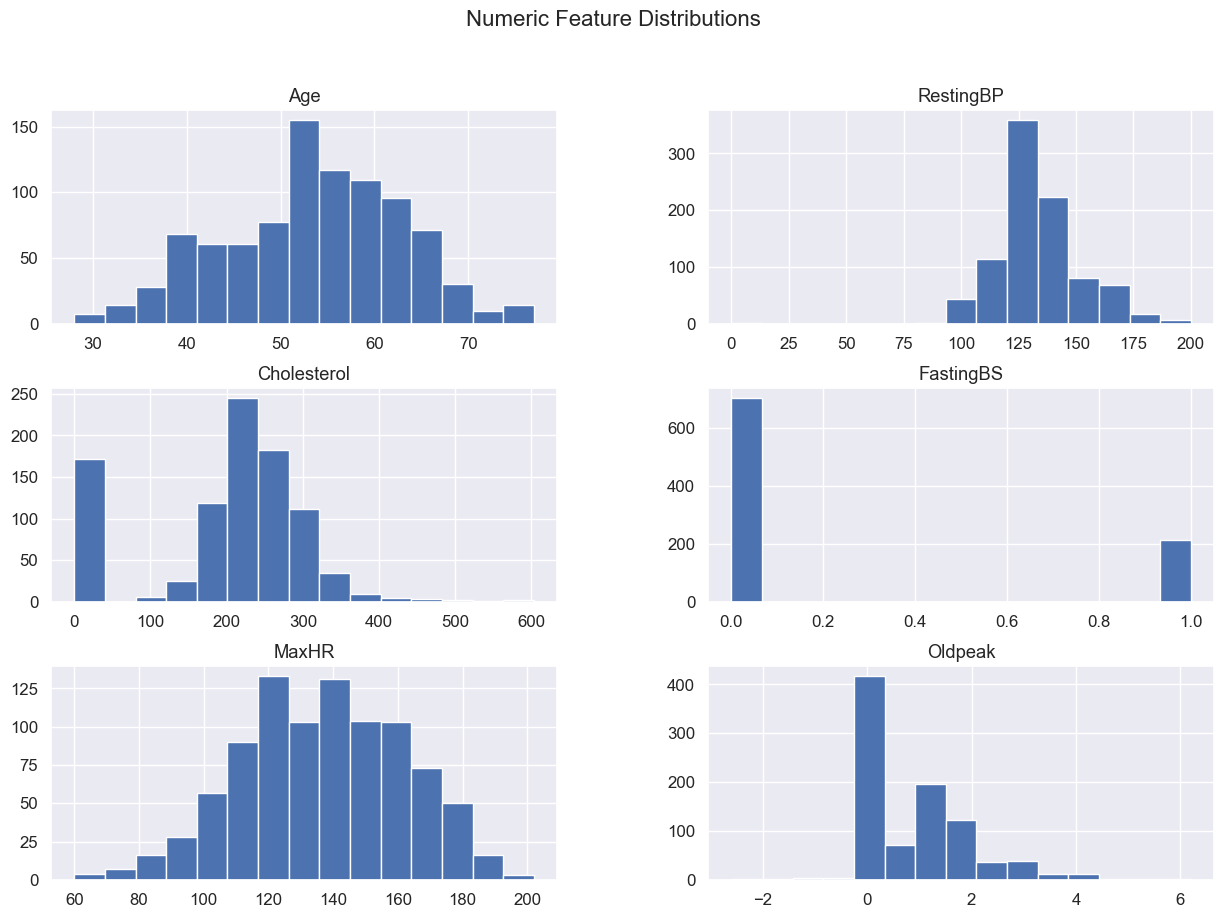

In [26]:
df[numeric_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Numeric Feature Distributions', fontsize=16)
plt.show()

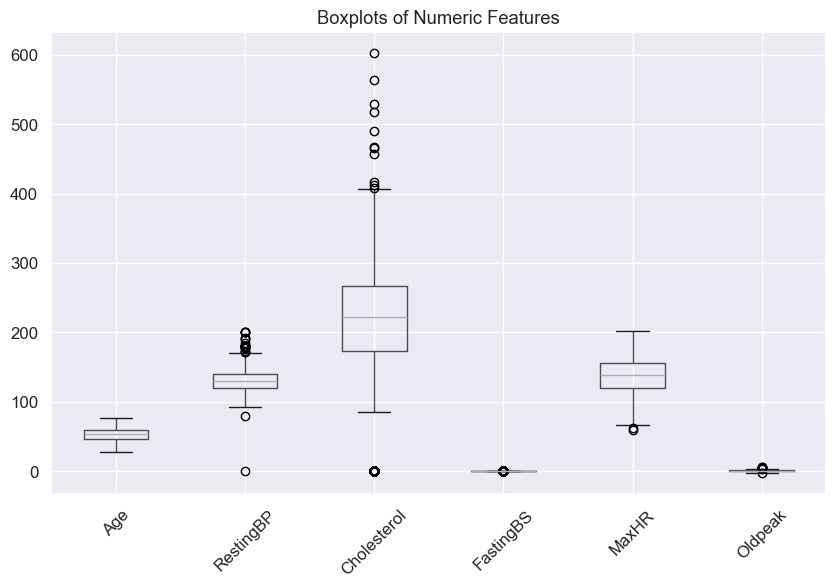

In [27]:
plt.figure(figsize=(10, 6))
df[numeric_features].boxplot()
plt.title('Boxplots of Numeric Features')
plt.xticks(rotation=45)
plt.show()

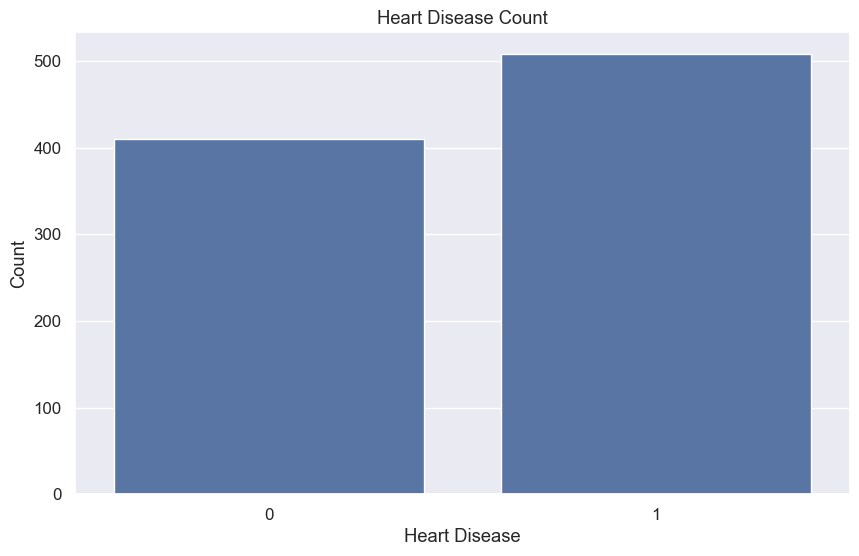

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df[target_col])
plt.title('Heart Disease Count')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

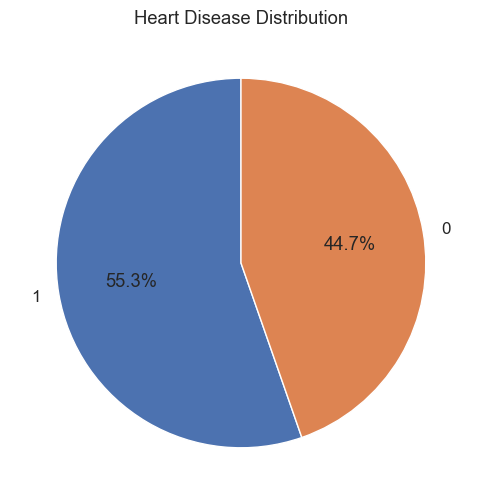

In [31]:
df[target_col].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=90)
plt.title('Heart Disease Distribution')
plt.ylabel('')
plt.show()

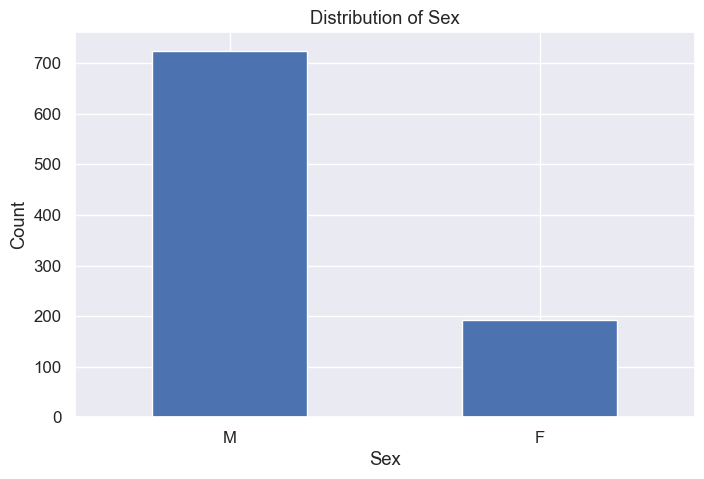

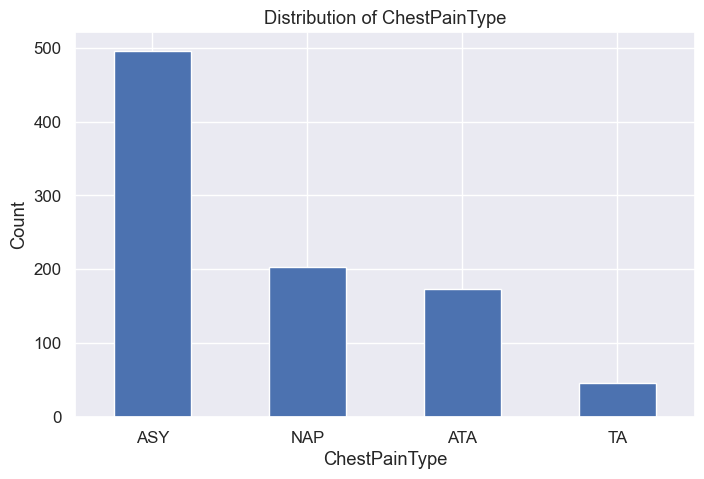

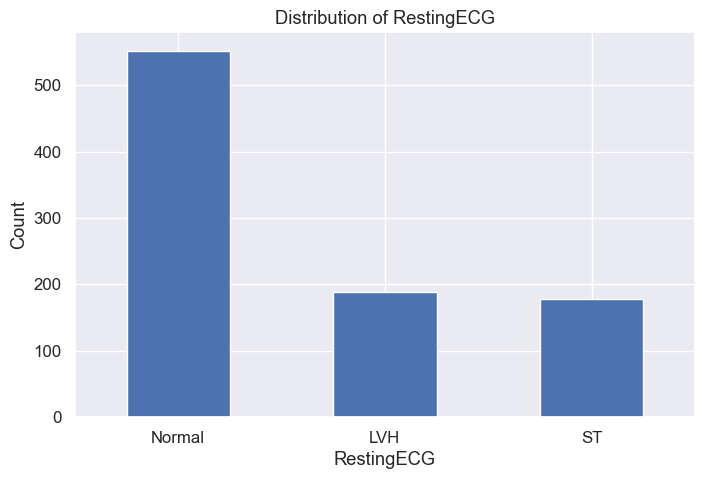

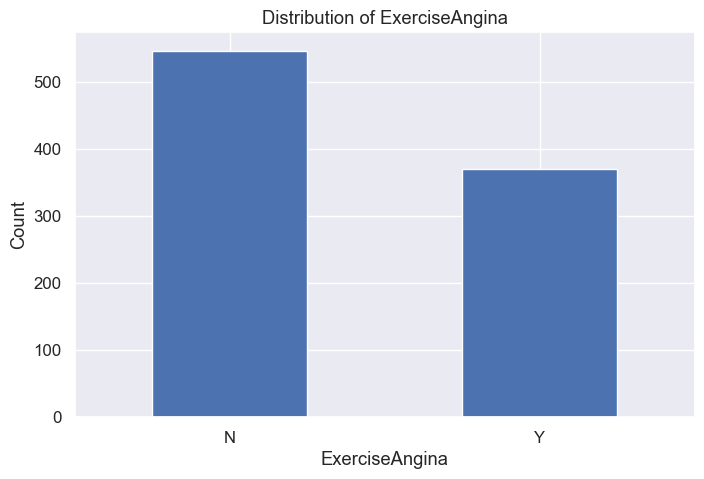

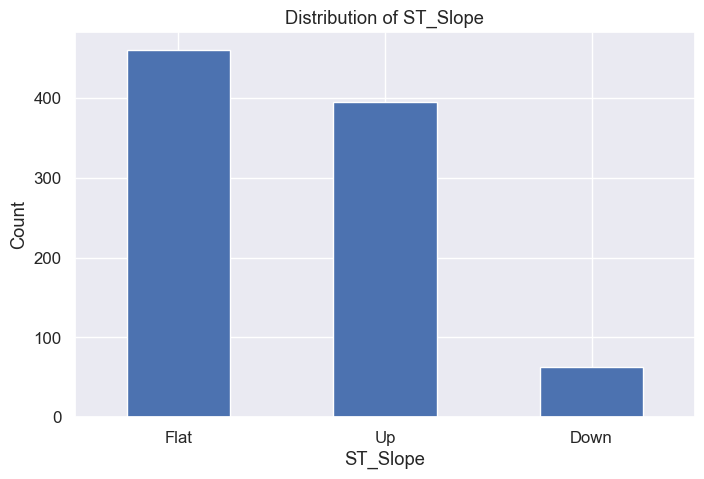

In [35]:
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot.bar()
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

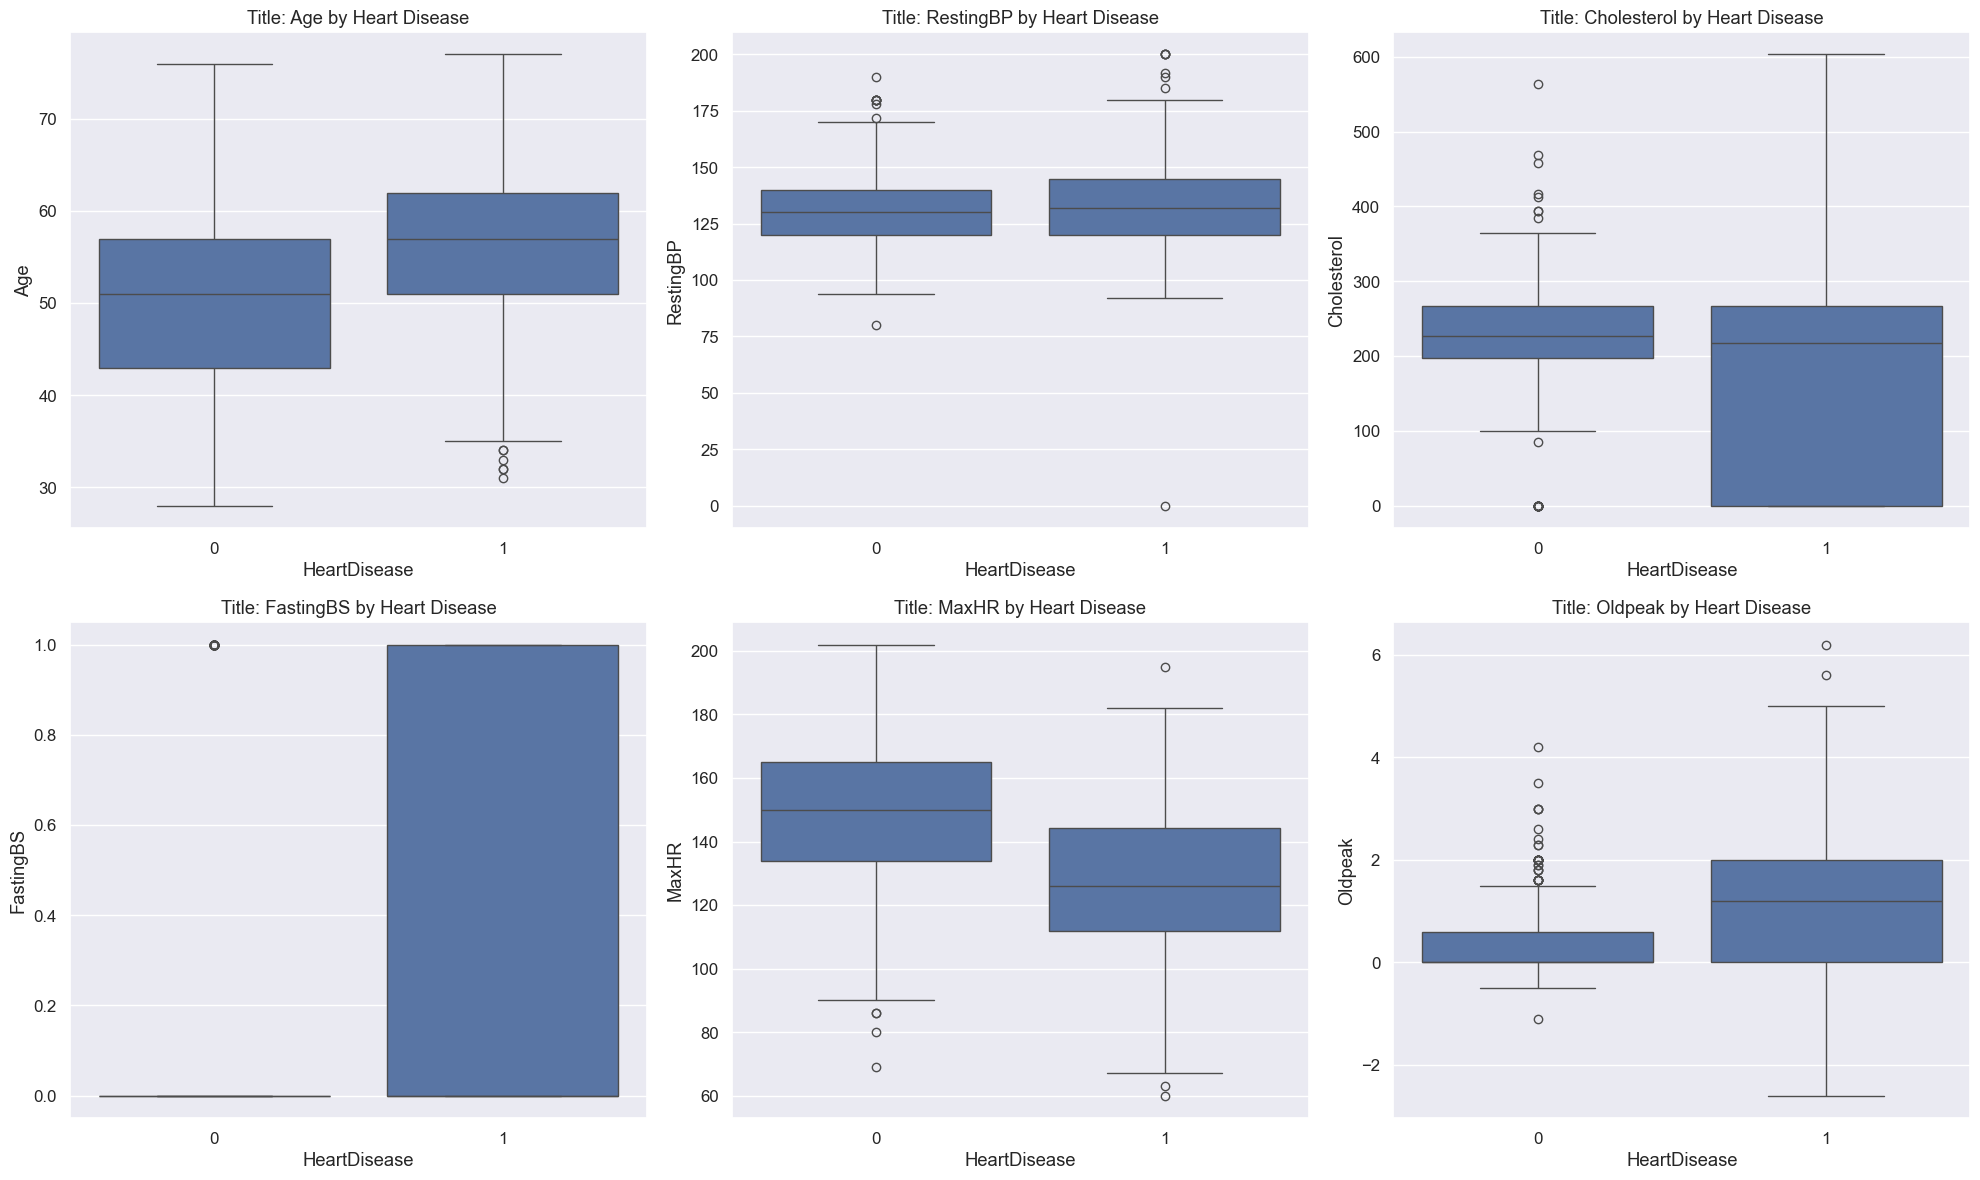

In [44]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=target_col, y=col, data=df)
    # sns.boxplot(x=df[target_col], y=df[col])
    plt.title(f'Title: {col} by Heart Disease')
plt.tight_layout()
plt.show()

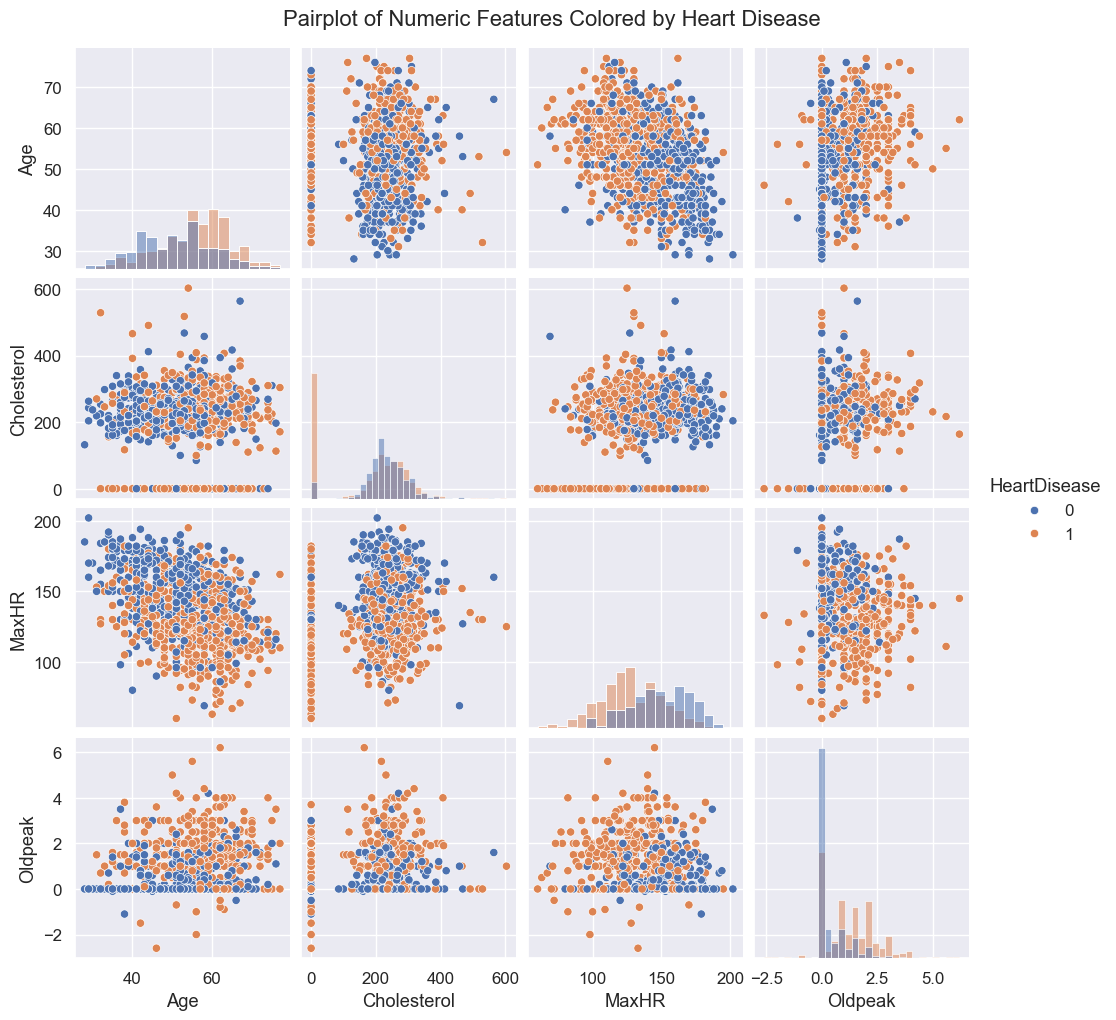

In [47]:
sns.pairplot(df[['Age', 'Cholesterol','MaxHR', 'Oldpeak', 'HeartDisease']], hue=target_col, diag_kind='hist')
plt.suptitle('Pairplot of Numeric Features Colored by Heart Disease', y=1.02)
plt.show()

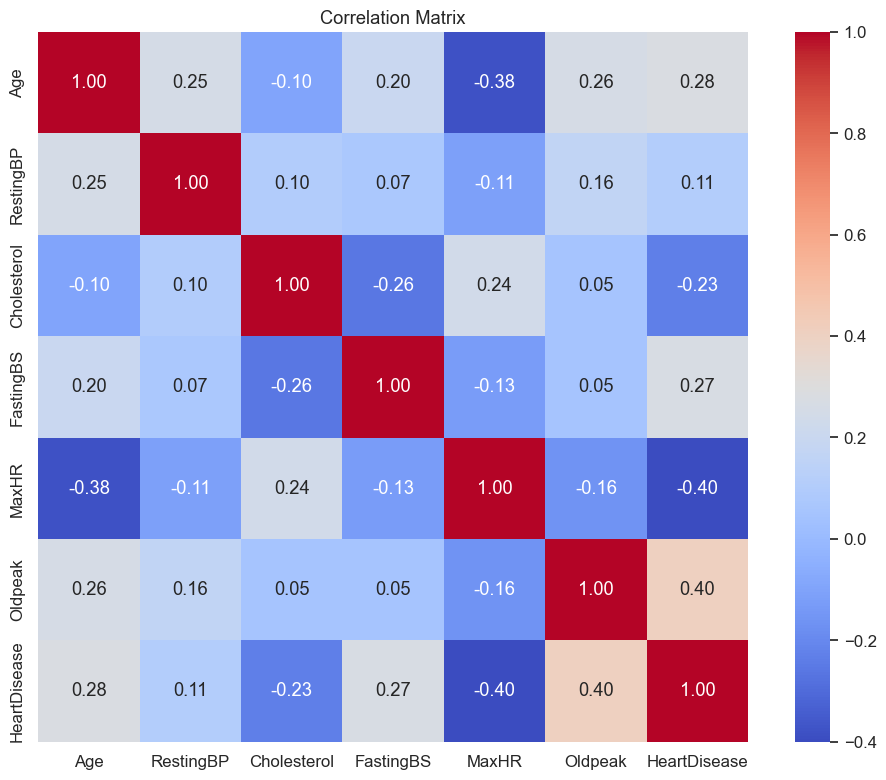

In [53]:
corr_matrix = df[numeric_features + [target_col]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [54]:
corr_matrix[target_col].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64


Crosstab of Sex and HeartDisease:
 HeartDisease         0         1
Sex                             
F             0.740933  0.259067
M             0.368276  0.631724


<Axes: title={'center': 'Stacked Bar Chart of Sex vs HeartDisease'}, xlabel='Sex'>

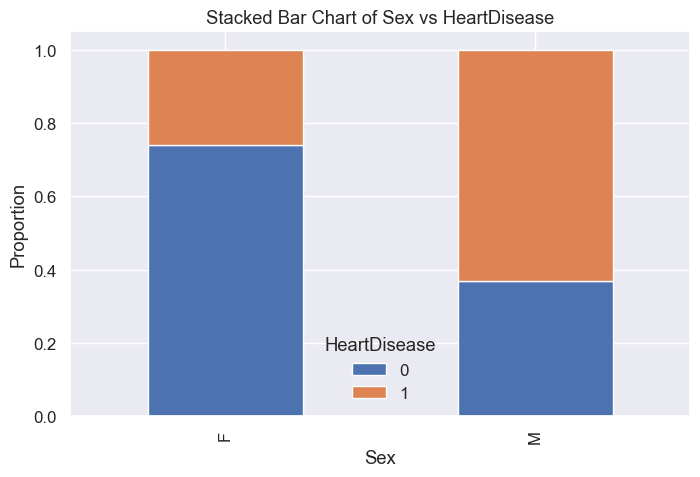


Crosstab of ChestPainType and HeartDisease:
 HeartDisease          0         1
ChestPainType                    
ASY            0.209677  0.790323
ATA            0.861272  0.138728
NAP            0.645320  0.354680
TA             0.565217  0.434783


<Axes: title={'center': 'Stacked Bar Chart of ChestPainType vs HeartDisease'}, xlabel='ChestPainType'>

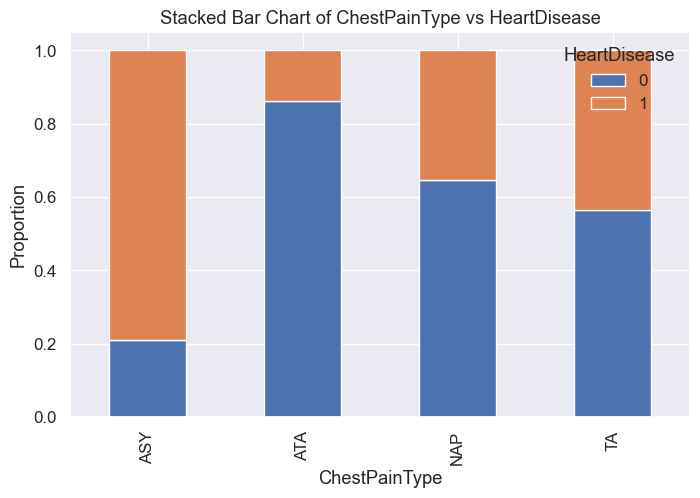


Crosstab of RestingECG and HeartDisease:
 HeartDisease         0         1
RestingECG                      
LVH           0.436170  0.563830
Normal        0.483696  0.516304
ST            0.342697  0.657303


<Axes: title={'center': 'Stacked Bar Chart of RestingECG vs HeartDisease'}, xlabel='RestingECG'>

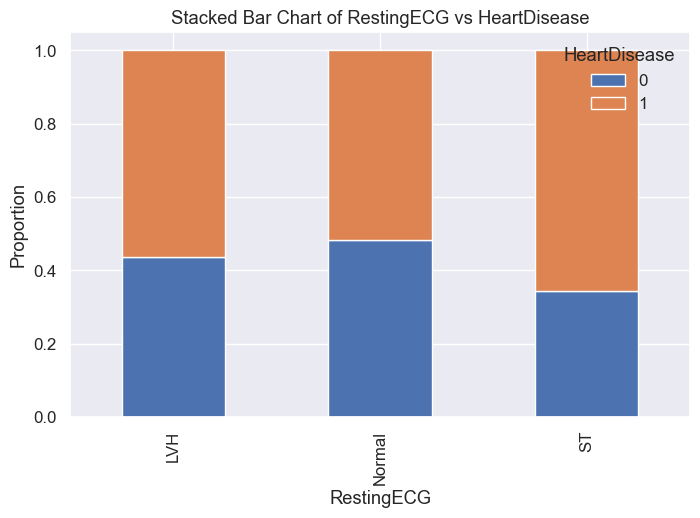


Crosstab of ExerciseAngina and HeartDisease:
 HeartDisease           0         1
ExerciseAngina                    
N               0.648995  0.351005
Y               0.148248  0.851752


<Axes: title={'center': 'Stacked Bar Chart of ExerciseAngina vs HeartDisease'}, xlabel='ExerciseAngina'>

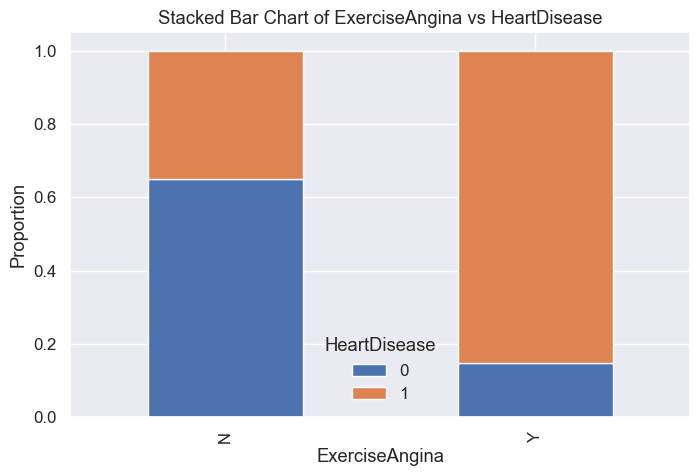


Crosstab of ST_Slope and HeartDisease:
 HeartDisease         0         1
ST_Slope                        
Down          0.222222  0.777778
Flat          0.171739  0.828261
Up            0.802532  0.197468


<Axes: title={'center': 'Stacked Bar Chart of ST_Slope vs HeartDisease'}, xlabel='ST_Slope'>

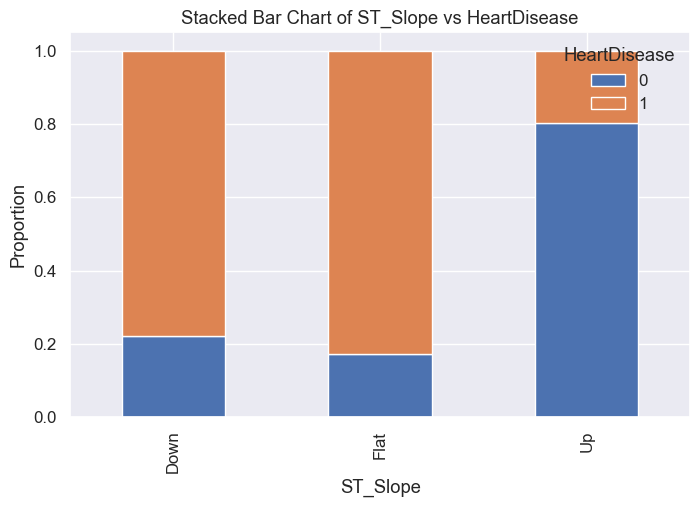

In [57]:
for col in categorical_features:
    ct = pd.crosstab(df[col], df[target_col], normalize='index')
    print(f"\nCrosstab of {col} and {target_col}:\n", ct)
    display(ct.plot.bar(stacked=True, figsize=(8, 5), title=f'Stacked Bar Chart of {col} vs {target_col}'))
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.show()